<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_002_one_sample_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction to Hypothesis Testing**

#### **What is Hypothesis Testing?**
Hypothesis testing is a statistical method used to evaluate whether a claim or assumption about a dataset is supported by evidence. It helps answer critical questions, such as:
- Is the observed difference between two groups meaningful, or could it have happened by chance?
- Does a new product, treatment, or process outperform an existing one?
- Are certain features in a dataset associated with specific outcomes?

For data scientists, hypothesis testing is fundamental in:
- A/B testing for experiments.
- Assessing model performance.
- Making data-driven recommendations.

---

### **Agenda for the Notebook**

#### **1. Foundations of Hypothesis Testing**
   - **What are Hypotheses?**
     - Null HO and Alternative HA.
   - **Errors in Testing**:
     - Type I error (alpha): Rejecting \(HO) when it’s true.
     - Type II error (beta): Failing to reject \(HO) when \(HA) is true.
   - **P-Values and Significance**:
     - Understanding p-values and their role in determining statistical significance.
     - Common thresholds (alpha = 0.05, 0.01).

---

#### **2. Parametric Tests (Assume Normality)**
   - **T-Test**:
     - Single-sample t-test.
     - Independent two-sample t-test.
     - Paired t-test.
   - **ANOVA (Analysis of Variance)**:
     - One-way ANOVA for comparing more than two groups.
     - Post-hoc tests (e.g., Tukey’s HSD).

---

#### **3. Non-Parametric Tests (No Normality Assumption)**
   - **When to Use Non-Parametric Tests**:
     - Data is not normally distributed.
     - Sample sizes are small.
   - Common Tests:
     - Mann-Whitney U Test (alternative to t-test).
     - Kruskal-Wallis Test (alternative to ANOVA).

---

#### **4. Categorical Data Analysis**
   - **Chi-Squared Test**:
     - Test of independence.
     - Goodness of fit.
   - **Fisher’s Exact Test**:
     - Used for small sample sizes in categorical data.

---

#### **5. Practical Applications**
   - **A/B Testing**:
     - Hypothesis testing in experiments (e.g., user behavior on a website).
     - Key metrics like conversion rates.
   - **Feature Evaluation**:
     - Testing whether certain features differ significantly across categories.
   - **Real-World Scenarios**:
     - Case studies (e.g., comparing treatment groups, marketing strategies).

---

#### **6. Visualizing Hypothesis Testing**
   - **Distribution Curves**:
     - Visualizing critical regions and p-values.
   - **Confidence Intervals**:
     - Linking intervals to hypothesis test outcomes.



### Load Iris Dataset

The Iris dataset is well-suited for hypothesis testing, especially given the work you've already done with summary statistics and visualizations. We can now leverage that groundwork to efficiently test hypotheses about its features.

Here’s how we can proceed:
1. **Formulate Simple Hypotheses**:
   - Example: "Is the mean petal length of `setosa` significantly different from `versicolor`?"

2. **Perform Basic Tests**:
   - Use t-tests and ANOVA for numerical features (e.g., `sepal length`, `petal width`).
   - Use chi-squared or Fisher’s exact tests if we need to examine categorical outcomes.

3. **Link Back to Visualizations**:
   - Compare test results with boxplots and density plots to validate findings visually.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## **Introduction to T-Tests**

#### **What is a T-Test?**
A **t-test** is a statistical test used to compare the means of one or more groups to determine if the differences are statistically significant. It assesses whether observed differences are likely due to chance or reflect a true difference in the population.

---

#### **Types of T-Tests**
1. **One-Sample T-Test**:
   - Compares the mean of a single sample to a known or hypothesized population mean.
   - Example: "Is the average sepal length of the Iris dataset equal to 5.0 cm?"

2. **Two-Sample (Independent) T-Test**:
   - Compares the means of two independent groups.
   - Example: "Do `setosa` and `versicolor` have different average petal lengths?"

3. **Paired T-Test**:
   - Compares the means of two related groups (e.g., before-and-after measurements).
   - Example: "Did the petal lengths of the same flowers increase after some treatment?"

---

#### **Why Use a T-Test?**
1. **Determine Significance**:
   - Tests if observed differences are likely due to random variation.
2. **Make Comparisons**:
   - Useful in experiments, A/B testing, and feature analysis.
3. **Assess Variability**:
   - Accounts for variability and sample size to make robust conclusions.

---

#### **Key Considerations**
1. **Normality**:
   - T-tests assume the data is approximately normally distributed. Use a non-parametric test (e.g., Mann-Whitney U) if this assumption is violated.
   
2. **Equal Variances**:
   - The two-sample t-test assumes equal variances between groups. If this isn’t true, use Welch’s t-test, which is more robust.

3. **P-Value**:
   - A small p-value (\( \leq 0.05 \)) indicates sufficient evidence to reject the null hypothesis, suggesting the means are significantly different.



### One-Sample T-Test

### **What is a One-Sample T-Test?**
A **one-sample t-test** is a statistical test used to determine whether the mean of a single sample is significantly different from a known or hypothesized population mean.

---

### **When to Use a One-Sample T-Test?**
The one-sample t-test is appropriate when:
1. **You Have a Single Sample**:
   - The dataset consists of a single group or condition (e.g., average height of plants in a specific region).
   
2. **You Have a Hypothesized Population Mean**:
   - You have a theoretical or reference value (e.g., industry standards, historical averages, or baseline measurements).

3. **You Want to Test Against That Mean**:
   - The goal is to test whether the sample’s mean is statistically significantly different from the hypothesized mean.

---

### **Examples of When to Use a One-Sample T-Test**
1. **Quality Control**:
   - Testing whether the average weight of a product matches the target weight specified by the manufacturer.
   
2. **Research Studies**:
   - Determining if the mean cholesterol level of a sample differs from the national average.
   
3. **Baseline Comparisons**:
   - Comparing a company’s sales for a given month against the historical average.

4. **Scientific Experiments**:
   - Evaluating whether a new drug maintains a target effect size (e.g., average reduction in blood pressure).

---

### **Assumptions of the One-Sample T-Test**
1. **Independence**:
   - The data points in the sample must be independent of each other.

2. **Normality**:
   - The data should be approximately normally distributed. For small sample sizes (\(n < 30\)), this assumption is crucial. For larger samples, the Central Limit Theorem generally makes the t-test robust to deviations from normality.

---

### **Limitations**
1. **Sensitive to Outliers**:
   - A few extreme values can significantly affect the mean and distort the results.
   
2. **Population Mean Must Be Known or Hypothesized**:
   - If you don’t have a valid reference mean, a one-sample t-test is not applicable.

---

### **Summary**
A one-sample t-test is useful for comparing a sample mean against a known value, such as an industry standard or baseline. It is especially valuable in quality control, scientific research, and baseline performance evaluations. However, it requires the assumption of normality and independence to provide accurate results.



### **Question**  
Is the average sepal length of the Iris dataset equal to 5.0 cm?

---

### **One-Sample T-Test**  
- **Null Hypothesis (\(H_0\))**: The average sepal length of the Iris dataset is equal to 5.0 cm.  
- **Alternative Hypothesis (\(H_1\))**: The average sepal length of the Iris dataset is not equal to 5.0 cm.  

---

### **Analysis and Interpretation**  
- The KDE curve shows that the sample distribution of sepal lengths is centered around 5.84 cm, far from the hypothesized mean of 5.0 cm.  
- The vertical dashed line at 5.0 cm represents the null hypothesis, visually highlighting the misalignment with the sample distribution.  
- The t-statistic of 12.47 and near-zero p-value confirm that the observed difference is statistically significant.  
- Both the plot and the statistical test strongly indicate that the average sepal length is significantly different from 5.0 cm, leading to rejection of the null hypothesis.  



One-Sample T-Test:
T-Statistic: 12.47
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The average sepal length is significantly different from 5.0 cm.




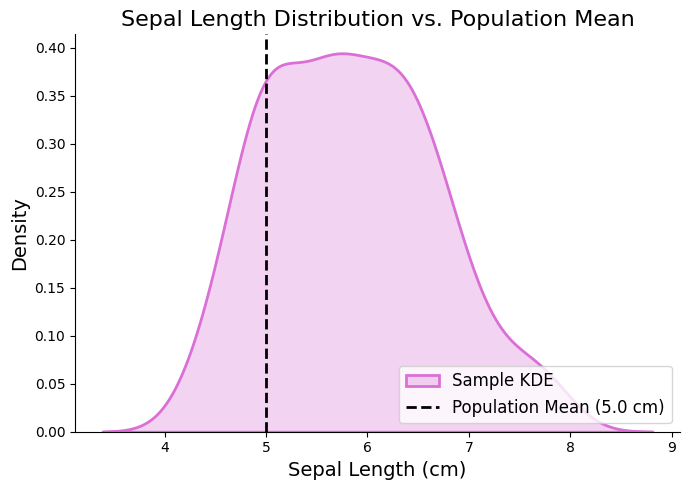

In [ ]:
from scipy.stats import ttest_1samp

# Question: Is the average sepal length of the Iris dataset equal to 5.0 cm?

# One-Sample T-Test
# Null Hypothesis (H0): The average sepal length of the Iris dataset is equal to 5.0 cm.
# Alternative Hypothesis (H1): The average sepal length of the Iris dataset is not equal to 5.0 cm.

# Perform a one-sample t-test
population_mean = 5.0
t_stat, p_value = ttest_1samp(iris_df['sepal length (cm)'], population_mean)

# Output results
print("One-Sample T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The average sepal length is significantly different from 5.0 cm.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference from 5.0 cm.")
print('\n')
plt.figure(figsize=(7, 5))

# Plot the KDE of the sample
sns.kdeplot(iris_df['sepal length (cm)'], fill=True, color="orchid", alpha=0.3, linewidth=2, label="Sample KDE")

# Add a line for the population mean
plt.axvline(x=population_mean, color="black", linestyle="--", linewidth=2, label="Population Mean (5.0 cm)")

# Customize the plot
plt.title("Sepal Length Distribution vs. Population Mean", fontsize=16)
plt.xlabel("Sepal Length (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="lower right")
sns.despine()
plt.tight_layout()
plt.show()



### **Question**  
Is the average petal width of the Iris dataset equal to 1.0 cm?

---

### **One-Sample T-Test**  
- **Null Hypothesis (\(H_0\))**: The average petal width of the Iris dataset is equal to 1.0 cm.  
- **Alternative Hypothesis (\(H_1\))**: The average petal width of the Iris dataset is not equal to 1.0 cm.  

---

### **Analysis and Interpretation**  
- The KDE curve shows the sample distribution of petal widths, centered around the sample mean, which is visibly offset from the hypothesized population mean of 1.0 cm.  
- The vertical dashed line at 1.0 cm represents the null hypothesis, and the sample distribution clearly peaks away from this value.  
- The t-statistic of 3.20 indicates that the observed difference is large relative to variability in the sample.  
- The p-value of 0.0017 is much smaller than the significance level (\(\alpha = 0.05\)), leading to rejection of the null hypothesis.  

---

### **Conclusion**  
The statistical test and the visual plot indicate that the average petal width of the Iris dataset is significantly different from 1.0 cm.  


One-Sample T-Test:
T-Statistic: 3.20
P-Value: 0.0017
Conclusion: Reject the null hypothesis. The average petal width is significantly different from 1.0 cm.




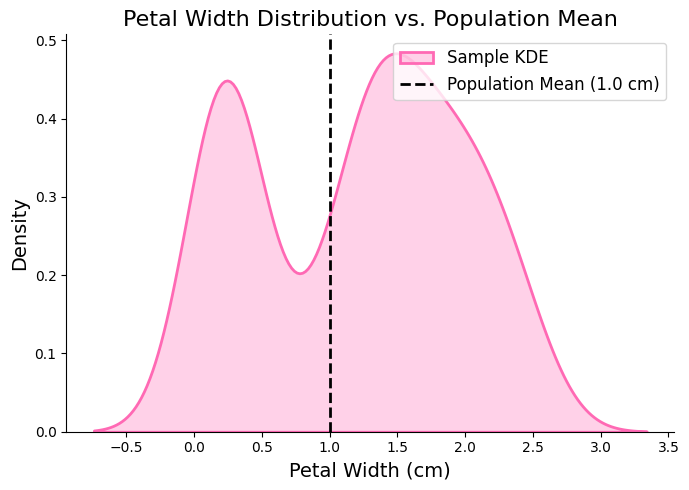

In [ ]:
from scipy.stats import ttest_1samp

# Perform a one-sample t-test
population_mean = 1.0
t_stat, p_value = ttest_1samp(iris_df['petal width (cm)'], population_mean)

# Output results
print("One-Sample T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The average petal width is significantly different from 1.0 cm.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference from 1.0 cm.")
print('\n')

# Visualization
plt.figure(figsize=(7,5))

# Plot the KDE of the sample
sns.kdeplot(iris_df['petal width (cm)'], fill=True, color="hotpink", alpha=0.3, linewidth=2, label="Sample KDE")

# Add a line for the population mean
plt.axvline(x=population_mean, color="black", linestyle="--", linewidth=2, label="Population Mean (1.0 cm)")

# Customize the plot
plt.title("Petal Width Distribution vs. Population Mean", fontsize=16)
plt.xlabel("Petal Width (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper right")
sns.despine()
plt.tight_layout()
plt.show()




### **Question**  
Is the average petal length of the Iris dataset equal to 4.5 cm?

---

### **One-Sample T-Test**  
- **Null Hypothesis (\(H_0\))**: The average petal length of the Iris dataset is equal to 4.5 cm.  
- **Alternative Hypothesis (\(H_1\))**: The average petal length of the Iris dataset is not equal to 4.5 cm.  

---

### **Analysis and Interpretation**  
- The KDE curve shows the sample distribution of petal lengths, centered around the sample mean, which is notably offset from the hypothesized population mean of 4.5 cm.  
- The vertical dashed line at 4.5 cm represents the null hypothesis, and the distribution peaks well away from this value.  
- The t-statistic of \(-5.15\) indicates a large negative difference between the sample mean and the hypothesized mean, relative to the variability in the sample.  
- The p-value (\( < 0.0001 \)) is far smaller than the significance level (\(\alpha = 0.05\)), leading to rejection of the null hypothesis.  

---

### **Conclusion**  
The statistical test and the visualization strongly indicate that the average petal length of the Iris dataset is significantly different from 4.5 cm.  


One-Sample T-Test:
T-Statistic: -5.15
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The average petal length is significantly different from 4.5 cm.




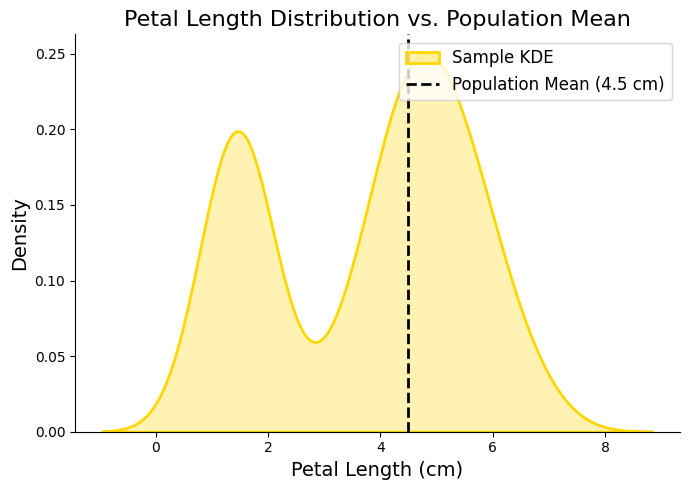

In [ ]:
from scipy.stats import ttest_1samp

# Perform a one-sample t-test
population_mean = 4.5
t_stat, p_value = ttest_1samp(iris_df['petal length (cm)'], population_mean)

# Output results
print("One-Sample T-Test:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The average petal length is significantly different from 4.5 cm.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference from 4.5 cm.")
print('\n')

# Visualization
plt.figure(figsize=(7,5))

# Plot the KDE of the sample
sns.kdeplot(iris_df['petal length (cm)'], fill=True, color="gold", alpha=0.3, linewidth=2, label="Sample KDE")

# Add a line for the population mean
plt.axvline(x=population_mean, color="black", linestyle="--", linewidth=2, label="Population Mean (4.5 cm)")

# Customize the plot
plt.title("Petal Length Distribution vs. Population Mean", fontsize=16)
plt.xlabel("Petal Length (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper right")
sns.despine()
plt.tight_layout()
plt.show()
